# Análise Exploratória Geração Tech Unimed BH Dio -  Ciência de Dados

### Análise de dados de um centro cirúrgico

Autor: Geraldo Henrique Fonseca

A base de dados é de um centro cirúrgico de um hospital de Belo Horizonte, os dados foram anonimanizados e foi feita a análise exploratória.

### Importa as bibliotecas para manipulação do banco de dados

In [1]:
# Importa as bibliotecas necessárias para manipulação de dados e construção de gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Importa biblioteca para checar tempo de execução de função
import time
import timeit
# Importa biblioteca para análise estatística
import statsmodels.api as sm
from scipy.stats import kstest
pd.set_option('display.max_columns',300) # mostrar até 300 colunas de um banco de dados
pd.set_option('display.max_rows',700) # mostrar até 700 linhas de um banco de dados
plt.style.use('seaborn')
# Importa o banco de dados do ano de 2012
df_2012 = pd.read_excel(r"D:\Cursos\Dio Dev Tech Unimed - Ciência de Dados\Desafio EDA Unimed - BH\BancoDadosCentroCirúrgico_2012.xlsx",sheet_name=0,header=0)
# Importa o banco de dados do ano de 2013
df_2013 = pd.read_excel(r"D:\Cursos\Dio Dev Tech Unimed - Ciência de Dados\Desafio EDA Unimed - BH\BancoDadosCentroCirúrgico_2013.xlsx",sheet_name=0,header=0)
# Junta os dois bancos de dados em um só com a função concat
df=pd.concat([df_2012,df_2013],ignore_index=True)

In [2]:
print(df.shape)
df.head() # mostra os 5 primeiros registros do banco de dados

(9848, 30)


,CD_AVISO_CIRURGIA,CD_ATENDIMENTO,CD_CIRURGIA,CD_ESPECIALID,TEMPO,DS_ESPECIALID,DS_CIRURGIA,N.um Cirurgias,CD_PRESTADOR,DS_ATI_MED,CD_CONVENIO,DS_CON_PLA,DT_AVISO_CIRURGIA,DT_PREV_INTER,DT_REALIZACAO,DT_INICIO_ANESTESIA,DT_INICIO_CIRURGIA,DT_FIM_CIRURGIA,DT_FIM_ANESTESIA,DT_SAIDA_SAL_CIR,DT_INICIO_LIMPEZA,DT_FIM_LIMPEZA,VL_TEMPO_DURACAO,SALA_CIR,DS_MOT_ATRASO,SN_UTI,VL_IDADE,DT_PREV_ALTA,Tempo de Sala,Dia da semana
0,100847,958167,2491,9.0,01:00:00,CARDIOLOGIA,GASTROSTOMIA ENDOSCÓPICA,1,5661,CIRURGIAO,21,SENIOR - APTO,2012-07-16 11:06:27,2012-07-17 11:30:00,2012-07-17 14:30:00,2012-07-17 14:40:00,2012-07-17 14:45:00,2012-07-17 15:10:00,2012-07-17 15:20:00,2012-07-17 15:30:00,2012-07-17 15:40:00,2012-07-17 15:53:00,2012-07-17 01:00:00,2,CC - ATRASO DO CIRURGIAO,N,86.0,2012-07-17 12:30:00,01:23:00,3
1,102212,958167,6,9.0,02:00:00,CARDIOLOGIA,GASTROSTOMIA PARA QUALQUER FINALIDADE,1,149,CIRURGIAO,21,SENIOR - APTO,2012-08-01 15:49:45,2012-08-03 14:00:00,2012-08-03 17:45:00,2012-08-03 17:55:00,2012-08-03 18:05:00,2012-08-03 19:40:00,2012-08-03 19:50:00,2012-08-03 20:00:00,2012-08-03 20:10:00,2012-08-03 20:23:00,2012-08-03 02:15:00,2,CC - A CIRURGIA A SEGUIR,N,86.0,2012-08-03 16:00:00,02:38:00,6
2,100918,970053,1061,15.0,02:00:00,CLINICA GERAL,OSTEOMIELITE PELVE TR CIRUR,1,9885,CIRURGIAO,162,AMB - ENF - OBS/CN,2012-07-16 16:13:34,2012-07-26 11:30:00,2012-07-26 11:30:00,2012-07-26 11:45:00,2012-07-26 12:00:00,2012-07-26 13:30:00,2012-07-26 13:40:00,2012-07-26 13:45:00,2012-07-26 13:55:00,2012-07-26 14:08:00,2012-07-26 02:15:00,2,NaN,N,58.0,2012-07-26 13:30:00,02:38:00,5
3,104245,970053,1947,15.0,01:00:00,CLINICA GERAL,DESBRIDAMENTO CIRURGICO - POR UNIDADE TOPOGRA...,1,9885,CIRURGIAO,211,Amb Enfermaria Obs,2012-08-24 11:15:59,2012-08-25 08:00:00,2012-08-25 08:40:00,2012-08-25 08:50:00,2012-08-25 09:00:00,2012-08-25 11:10:00,2012-08-25 11:15:00,2012-08-25 11:20:00,2012-08-25 11:21:00,2012-08-25 11:31:00,2012-08-25 02:40:00,2,CC - ATRASO DO CIRURGIAO,N,58.0,2012-08-25 09:00:00,02:51:00,7
4,104670,970053,1947,15.0,01:00:00,CLINICA GERAL,DESBRIDAMENTO CIRURGICO - POR UNIDADE TOPOGRA...,1,9885,CIRURGIAO,211,Amb Enfermaria Obs,2012-08-30 15:06:34,2012-09-01 06:30:00,2012-09-01 08:30:00,2012-09-01 08:50:00,2012-09-01 09:10:00,2012-09-01 09:40:00,2012-09-01 09:50:00,2012-09-01 10:00:00,2012-09-01 10:10:00,2012-09-01 10:11:00,2012-09-01 01:30:00,2,CC - ATRASO DO CIRURGIAO,N,59.0,2012-09-01 07:30:00,01:41:00,7


O banco de dados é composto pela variáveis

 CD_AVISO_CIRURGIA 
 CD_ATENDIMENTO              
 CD_CIRURGIA                   
 CD_ESPECIALID               
 TEMPO                        
 DS_ESPECIALID                
 DS_CIRURGIA                  
 N.um Cirurgias                
 CD_PRESTADOR                  
 DS_ATI_MED                   
 CD_CONVENIO                   
 DS_CON_PLA                 
 DT_AVISO_CIRURGIA    
 DT_PREV_INTER        
 DT_REALIZACAO        
 DT_INICIO_ANESTESIA  
 DT_INICIO_CIRURGIA   
 DT_FIM_CIRURGIA      
 DT_FIM_ANESTESIA     
 DT_SAIDA_SAL_CIR     
 DT_INICIO_LIMPEZA    
 DT_FIM_LIMPEZA       
 VL_TEMPO_DURACAO     
 SALA_CIR                      
 DS_MOT_ATRASO                
 SN_UTI                       
 VL_IDADE                    
 DT_PREV_ALTA         
 Tempo de Sala                
 Dia da semana 

### Sanity check: analisar se há duplicidades, se há missing; tratar os possíveis erros encontrados

In [3]:
# Retorna a quantidade de variáveis, tipo de cada uma e se há valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9848 entries, 0 to 9847
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CD_AVISO_CIRURGIA    9848 non-null   int64         
 1   CD_ATENDIMENTO       9848 non-null   int64         
 2   CD_CIRURGIA          9848 non-null   int64         
 3   CD_ESPECIALID        9847 non-null   float64       
 4   TEMPO                9848 non-null   object        
 5   DS_ESPECIALID        9847 non-null   object        
 6   DS_CIRURGIA          9848 non-null   object        
 7   N.um Cirurgias       9848 non-null   int64         
 8   CD_PRESTADOR         9848 non-null   int64         
 9   DS_ATI_MED           9848 non-null   object        
 10  CD_CONVENIO          9848 non-null   int64         
 11  DS_CON_PLA           9694 non-null   object        
 12  DT_AVISO_CIRURGIA    9848 non-null   datetime64[ns]
 13  DT_PREV_INTER        9758 non-nul

#### Validando os formatos

In [4]:
# Validando os formatos de forma automática (sem usar o astype)
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9848 entries, 0 to 9847
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CD_AVISO_CIRURGIA    9848 non-null   Int64         
 1   CD_ATENDIMENTO       9848 non-null   Int64         
 2   CD_CIRURGIA          9848 non-null   Int64         
 3   CD_ESPECIALID        9847 non-null   Int64         
 4   TEMPO                9848 non-null   string        
 5   DS_ESPECIALID        9847 non-null   string        
 6   DS_CIRURGIA          9848 non-null   string        
 7   N.um Cirurgias       9848 non-null   Int64         
 8   CD_PRESTADOR         9848 non-null   Int64         
 9   DS_ATI_MED           9848 non-null   string        
 10  CD_CONVENIO          9848 non-null   Int64         
 11  DS_CON_PLA           9694 non-null   string        
 12  DT_AVISO_CIRURGIA    9848 non-null   datetime64[ns]
 13  DT_PREV_INTER        9758 non-nul

In [5]:
# convert_dtypes() não tratou todas as variáveis de forma correta, algumas serão feitas usando astype
# Cria lista de variáveis que terão que ser mudadas de formato, algumas de int para categórica, string para time
# convert_dtypes não tratou corretamente todos os formatos
categorical = ['CD_AVISO_CIRURGIA','CD_ATENDIMENTO','CD_CIRURGIA','CD_ESPECIALID','CD_PRESTADOR','CD_CONVENIO','SALA_CIR','Dia da semana']
tempo = ['TEMPO','Tempo de Sala']

for col in categorical:
    df[col] = df[col].astype(str).mask(df[col].isnull(), np.NaN)

for col in tempo:
    df[col]=pd.to_datetime(df[col],format='%H:%M:%S')


df.insert(5,'TEMPO_ESTIMADO_MIN',-1)
df.insert(24,'VL_TEMPO_DURACAO_MIN',-1)
df.insert(31,'TEMPO_DE_SALA_MIN',-1)

df['TEMPO_ESTIMADO_MIN'] = df['TEMPO'].dt.hour*60+df['TEMPO'].dt.minute+df['TEMPO'].dt.second/60
df['VL_TEMPO_DURACAO_MIN']=(df['DT_SAIDA_SAL_CIR']-df['DT_REALIZACAO']).dt.total_seconds()/60
df['TEMPO_DE_SALA_MIN'] = df['Tempo de Sala'].dt.hour*60+df['Tempo de Sala'].dt.minute+df['Tempo de Sala'].dt.second/60
df['TEMPO']=df['TEMPO'].apply(lambda x: x.strftime('%H:%M:%S'))
df.rename({'TEMPO':'TEMPO_ESTIMADO'},axis=1,inplace=True)
df['Tempo de Sala']=df['Tempo de Sala'].apply(lambda x: x.strftime('%H:%M:%S'))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9848 entries, 0 to 9847
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CD_AVISO_CIRURGIA     9848 non-null   object        
 1   CD_ATENDIMENTO        9848 non-null   object        
 2   CD_CIRURGIA           9848 non-null   object        
 3   CD_ESPECIALID         9847 non-null   object        
 4   TEMPO_ESTIMADO        9848 non-null   object        
 5   TEMPO_ESTIMADO_MIN    9848 non-null   float64       
 6   DS_ESPECIALID         9847 non-null   string        
 7   DS_CIRURGIA           9848 non-null   string        
 8   N.um Cirurgias        9848 non-null   Int64         
 9   CD_PRESTADOR          9848 non-null   object        
 10  DS_ATI_MED            9848 non-null   string        
 11  CD_CONVENIO           9848 non-null   object        
 12  DS_CON_PLA            9694 non-null   string        
 13  DT_AVISO_CIRURGIA 

#### Removendo duplicados e missing

In [6]:
duploDF = df.duplicated().value_counts()
registros = df.shape[0]
print(f"Há {duploDF.loc[True]}({duploDF.loc[True]*100/registros:.2f}%) linha(s) duplicada(s)")

Há 13(0.13%) linha(s) duplicada(s)


In [7]:
# Remove registro duplicado nas linhas
df.drop_duplicates(inplace=True)

In [8]:
#Checa se CD_AVISO_CIRURGIA só tem chaves únicas
duploCD_AVISO_CIRURGIA=df['CD_AVISO_CIRURGIA'].duplicated().value_counts()
print(f"Há {duploCD_AVISO_CIRURGIA.loc[True]}({duploCD_AVISO_CIRURGIA.loc[True]*100/registros:.2f}%) registro(s) de CD_AVISO_CIRURGIA duplicado(s)")
if duploCD_AVISO_CIRURGIA.loc[True]>0:
    #remove os registros duplicados
    df.drop_duplicates(subset=['CD_AVISO_CIRURGIA'],inplace=True)

Há 10(0.10%) registro(s) de CD_AVISO_CIRURGIA duplicado(s)


In [9]:
#Checa se CD_ATENDIMENTO só tem chaves únicas
duploCD_ATENDIMENTO=df['CD_ATENDIMENTO'].duplicated().value_counts()
print(f"Há {duploCD_ATENDIMENTO.loc[True]}({duploCD_ATENDIMENTO.loc[True]*100/registros:.2f}%) registro(s) de CD_ATENDIMENTO duplicado(s)")
if duploCD_ATENDIMENTO.loc[True]>0:
    #remove os registros duplicados
    df.drop_duplicates(subset=['CD_ATENDIMENTO'],inplace=True)

Há 563(5.72%) registro(s) de CD_ATENDIMENTO duplicado(s)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9262 entries, 0 to 9847
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CD_AVISO_CIRURGIA     9262 non-null   object        
 1   CD_ATENDIMENTO        9262 non-null   object        
 2   CD_CIRURGIA           9262 non-null   object        
 3   CD_ESPECIALID         9261 non-null   object        
 4   TEMPO_ESTIMADO        9262 non-null   object        
 5   TEMPO_ESTIMADO_MIN    9262 non-null   float64       
 6   DS_ESPECIALID         9261 non-null   string        
 7   DS_CIRURGIA           9262 non-null   string        
 8   N.um Cirurgias        9262 non-null   Int64         
 9   CD_PRESTADOR          9262 non-null   object        
 10  DS_ATI_MED            9262 non-null   string        
 11  CD_CONVENIO           9262 non-null   object        
 12  DS_CON_PLA            9131 non-null   string        
 13  DT_AVISO_CIRURGIA 

Checando a distribuição da variável VL_IDADE

Valor-p Kolmogorov test: 0.0


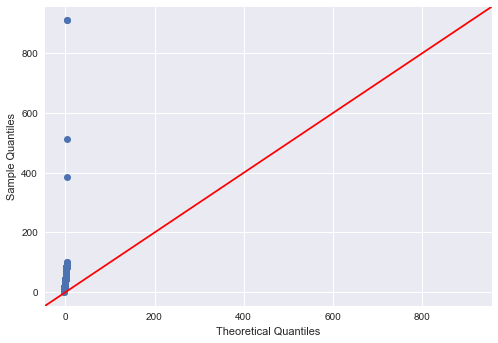

In [11]:
#Remove os missing para checar se a variável possui distribuição normal, caso tenha 
idade_not_nan=df['VL_IDADE'][df['VL_IDADE'].notnull()].values.astype(int)
# irá substituir os valores de missing pela média, caso não haja serão retirados do banco de dados casos de missing
statsKs, pKs= kstest(idade_not_nan,'norm')
print(f'Valor-p Kolmogorov test: {pKs}')
sm.qqplot(idade_not_nan,line='45')
plt.show()

In [12]:
# Retirando missing 
df.dropna(axis=0,subset=['VL_IDADE','CD_ESPECIALID'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9066 entries, 0 to 9847
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CD_AVISO_CIRURGIA     9066 non-null   object        
 1   CD_ATENDIMENTO        9066 non-null   object        
 2   CD_CIRURGIA           9066 non-null   object        
 3   CD_ESPECIALID         9066 non-null   object        
 4   TEMPO_ESTIMADO        9066 non-null   object        
 5   TEMPO_ESTIMADO_MIN    9066 non-null   float64       
 6   DS_ESPECIALID         9066 non-null   string        
 7   DS_CIRURGIA           9066 non-null   string        
 8   N.um Cirurgias        9066 non-null   Int64         
 9   CD_PRESTADOR          9066 non-null   object        
 10  DS_ATI_MED            9066 non-null   string        
 11  CD_CONVENIO           9066 non-null   object        
 12  DS_CON_PLA            8953 non-null   string        
 13  DT_AVISO_CIRURGIA 

### Criando variáveis para análise exploratória e a variável resposta Change Over(avalia o tempo de troca de uma cirurgia para outra na mesma sala cirúrgica). 

In [13]:
# Ordena o banco e cria coluna Ordem  cirurgia em cada sala para cada data
df.sort_values(by=['SALA_CIR','DT_INICIO_ANESTESIA'],axis=0, ascending=True, inplace=True)
df.reset_index(inplace=True, drop=True)
df['ORDEM_CIR_DIA']=1
df['DATA_REALIZACAO']=df['DT_REALIZACAO'].dt.date # extrai a data do timestamp
# foi usado para verificar as ordens das cirurgias
def ordem_cir_dia(df):
    ordem=1
    for index in range(df.shape[0]-1):
        if df.loc[index+1,'DATA_REALIZACAO']==df.loc[index,'DATA_REALIZACAO'] and df.loc[index+1,'SALA_CIR']==df.loc[index,'SALA_CIR']:
            ordem+=1
            df.loc[index+1,'ORDEM_CIR_DIA']=ordem
        else:
            ordem=1

inicio = timeit.default_timer()
ordem_cir_dia(df)
fim = timeit.default_timer()
print ('Tempo de duração da criação da variável ordem cirurgia: %f' % (fim - inicio))
df.head()

Tempo de duração da criação da variável ordem cirurgia: 0.835423


,CD_AVISO_CIRURGIA,CD_ATENDIMENTO,CD_CIRURGIA,CD_ESPECIALID,TEMPO_ESTIMADO,TEMPO_ESTIMADO_MIN,DS_ESPECIALID,DS_CIRURGIA,N.um Cirurgias,CD_PRESTADOR,DS_ATI_MED,CD_CONVENIO,DS_CON_PLA,DT_AVISO_CIRURGIA,DT_PREV_INTER,DT_REALIZACAO,DT_INICIO_ANESTESIA,DT_INICIO_CIRURGIA,DT_FIM_CIRURGIA,DT_FIM_ANESTESIA,DT_SAIDA_SAL_CIR,DT_INICIO_LIMPEZA,DT_FIM_LIMPEZA,VL_TEMPO_DURACAO,VL_TEMPO_DURACAO_MIN,SALA_CIR,DS_MOT_ATRASO,SN_UTI,VL_IDADE,DT_PREV_ALTA,Tempo de Sala,TEMPO_DE_SALA_MIN,Dia da semana,ORDEM_CIR_DIA,DATA_REALIZACAO
0,96365,1120019,989,11,02:30:00,150.0,CIRURGIA GERAL,COLECISTECTOMIA COM COLANGIOGRAFIA,1,5270,CIRURGIAO,123,PAMI - APTO,2012-05-23 09:17:08,2012-06-01 08:00:00,2012-06-01 09:00:00,2012-06-01 09:10:00,2012-06-01 09:30:00,2012-06-01 11:00:00,2012-06-01 11:30:00,2012-06-01 11:40:00,2012-06-01 11:50:00,2012-06-01 12:00:00,2012-06-01 02:40:00,160.0,1,CC - ATRASO DO CIRURGIAO,N,36,2012-06-01 10:30:00,03:00:00,180.0,6,1,2012-06-01
1,96890,1119574,2276,46,01:00:00,60.0,UROLOGIA,CALCULODE BEXIGA EXTRACAO POR ENDOSCOPIA,1,45,CIRURGIAO,162,UNIPLAN AMB-OBS C NAC ULTRAGAZ,2012-05-29 15:21:00,2012-06-01 12:00:00,2012-06-01 13:50:00,2012-06-01 14:00:00,2012-06-01 14:05:00,2012-06-01 14:50:00,2012-06-01 14:55:00,2012-06-01 14:56:00,2012-06-01 15:00:00,2012-06-01 15:13:00,2012-06-01 01:06:00,66.0,1,CC - ATRASO DO MATERIAL CONSIGNADO,N,29,2012-06-01 13:00:00,01:23:00,83.0,6,2,2012-06-01
2,94620,1120896,1400,33,02:00:00,120.0,ORTOPEDIA,SINOVECTOMIA DO JOELHO,1,1102,CIRURGIAO,7,BRONZE I,2012-04-30 14:55:09,2012-06-01 19:00:00,2012-06-01 18:30:00,2012-06-01 18:40:00,2012-06-01 18:50:00,2012-06-01 19:20:00,2012-06-01 19:30:00,2012-06-01 19:40:00,2012-06-01 19:50:00,2012-06-01 20:03:00,2012-06-01 01:10:00,70.0,1,<NA>,N,66,2012-06-01 21:00:00,01:33:00,93.0,6,3,2012-06-01
3,97294,1121130,1822,46,03:00:00,180.0,UROLOGIA,COLOCACAO URETEROSCOPICA DE DUPLO J,1,236,CIRURGIAO,3,ESPECIAL INDIVIDUAL,2012-06-01 17:15:33,2012-06-02 13:00:00,2012-06-02 10:10:00,2012-06-02 10:20:00,2012-06-02 10:30:00,2012-06-02 11:10:00,2012-06-02 11:20:00,2012-06-02 11:30:00,2012-06-02 11:31:00,2012-06-02 11:34:00,2012-06-02 01:20:00,80.0,1,<NA>,N,28,2012-06-02 16:00:00,01:24:00,84.0,7,1,2012-06-02
4,92111,1121463,2349,31,00:30:00,30.0,OFTALMOLOGIA,FACECTOMIA COM IMPLANTE DE LIO,1,778,CIRURGIAO,3,ESPECIAL EMPRESARIAL,2012-03-22 16:48:22,2012-06-02 11:00:00,2012-06-02 12:10:00,2012-06-02 12:12:00,2012-06-02 12:15:00,2012-06-02 13:20:00,2012-06-02 13:22:00,2012-06-02 13:25:00,2012-06-02 13:35:00,2012-06-02 13:48:00,2012-06-02 01:15:00,75.0,1,CC - ATRASO DO CIRURGIAO,N,80,2012-06-02 12:00:00,01:38:00,98.0,7,2,2012-06-02


In [14]:
# Cálculo do change over
def change_over(df):
    for index in range(df.shape[0]):
        if df.loc[index,'ORDEM_CIR_DIA']==1:
            df.loc[index,'CHANGE_OVER_MIN']=0
        else:
            df.loc[index,'CHANGE_OVER_MIN']=(df.loc[index,'DT_REALIZACAO']-df.loc[index-1,'DT_FIM_LIMPEZA']).total_seconds()/60
    
inicio = timeit.default_timer()
change_over(df)
fim = timeit.default_timer()
print ('Tempo de duração da criação da variável change over: %f' % (fim - inicio))

Tempo de duração da criação da variável change over: 1.029989


In [15]:
# Criar variável se foi manhã, tarde ou noite que iniciou a cirurgia
df['PARTE_DIA_REALIZACAO']=df['DT_REALIZACAO'].dt.strftime('%H:%M:%S')

def parte_dia_cirurgia(col):
    for index in range(df.shape[0]):
        if (df.loc[index,col]) <'12:00:00':
            df.loc[index,'PARTE_DIA']='manhã'
        elif (df.loc[index,col]) >='12:00:00' and (df.loc[index,col]) <'18:00:00':
            df.loc[index,'PARTE_DIA']='tarde'
        else:
            df.loc[index,'PARTE_DIA']='noite'
            
#Criar variável se change over foi maior que 40 min
#Considerado tempo de limpeza bom se for até 30 minutos, a equipe retira o paciente e começa a limpeza. 
#Após a limpeza entra outro paciente. (40 min seria a retriada do paciente e tempo total de limpeza). A limpeza começa após retirar o paciente
#Então a equipe sabe que o paciente saiu e já pode buscar outro paciente, enquanto é feita a limpeza já pode começar o transporte do próximo paciente

def change_over_acima_40min(col):
    for index in range(df.shape[0]):
        if (df.loc[index,col]):
            df.loc[index,'CHANGE_OVER_ACIMA40MIN']='1'
        else:
            df.loc[index,'CHANGE_OVER_ACIMA40MIN']='0'

In [16]:
# Checa se há valores de change over negativo, o que não pode ocorre e possível erro de lançamento do tempo ou sala de cirurgia do paciente
change_over_negativos = df.CHANGE_OVER_MIN[df['CHANGE_OVER_MIN']<0].count()
if change_over_negativos>0:
    print('Inconsistência nos dados, há {} valores negativos de troca de sala. Esses pacientes serão removidos da base de dados.')
    # Remove os pacientes com valores negativos de change over
    df.drop(df[df['CHANGE_OVER_MIN']<0].index,inplace=True)
    df.reset_index(inplace=True, drop=True)
    # Novo cálculo da ordem da cir da sala após remover change over menor que zero, possível erro de timestamp
    inicio = timeit.default_timer()
    ordem_cir_dia(df)
    fim = timeit.default_timer()
    print ('duracao: %f' % (fim - inicio))
    

Inconsistência nos dados, há {} valores negativos de troca de sala. Esses pacientes serão removidos da base de dados.
duracao: 0.620433


In [17]:
# Tempo em minutos do horário previsto para a realização da internação para a cirurgia e o horário realizado da internação
# Pode haver tempo negativo, ocorre se a realização da cirurgia foi antecipada
df['TEMPO_INTER_REAL_MIN']=(df['DT_REALIZACAO']-df['DT_PREV_INTER']).dt.total_seconds()/60

In [18]:
# Checa se sem atraso há motivo
ChecaInconsistenciaAtrasoTempo=((df['TEMPO_INTER_REAL_MIN']<=0) & (df['DS_MOT_ATRASO'].notna()))
if ChecaInconsistenciaAtrasoTempo.value_counts().shape[0]>1:
    print(f"Inconsistência nos dados, não deveria ter motivo de atraso. {ChecaInconsistenciaAtrasoTempo.value_counts().values[1]} registros serão removidos")
    df.drop(df[ChecaInconsistenciaAtrasoTempo].index,inplace=True)
    df.reset_index(inplace=True, drop=True)

Inconsistência nos dados, não deveria ter motivo de atraso. 128 registros serão removidos


In [19]:
# Preenche DS_MOT_ATRASO com NA e possui atraso com OUTROS
df['DS_MOT_ATRASO'][(df['TEMPO_INTER_REAL_MIN']>0) & (df['DS_MOT_ATRASO'].isnull())]='OUTROS'
# Preenche DS_MOT_ATRASO com NA e não possui atraso com SEM ATRASO
df['DS_MOT_ATRASO'][(df['TEMPO_INTER_REAL_MIN']<=0) & (df['DS_MOT_ATRASO'].isnull())]='SEM ATRASO'
# Retirar CC -; CC - A; CCA - dos motivos do atraso
df['DS_MOT_ATRASO']=df['DS_MOT_ATRASO'].replace({'CC - ATRASO DO CIRURGIAO':'ATRASO DO CIRURGIAO',
                                                 'CC - A ATRASO EQUIPE MÉDICA':'ATRASO EQUIPE MÉDICA',
                                                 'CC - A CIRURGIA A SEGUIR':'CIRURGIA A SEGUIR',
                                                 'CC - CIRURGIA ANTERIOR C/ TEMPO MAIOR PROGRAMADO':'CIRURGIA ANTERIOR C/ TEMPO MAIOR PROGRAMADO',
                                                 'CC - A CIRURGIA ANTERIOR C/ TEMPO MAIOR PROGRAMADO':'CIRURGIA ANTERIOR C/ TEMPO MAIOR PROGRAMADO',
                                                 'CC - CIRURGIA DE URGENCIA':'CIRURGIA DE URGENCIA',
                                                 'CC - ALTA EVASAO':'OUTROS',
                                                 'CCA -  ATRASO NO PREPARO DO PACIENTE NA UNIDADE':'OUTROS',
                                                 'CC - A TRANSPORTE DO SETOR':'OUTROS',
                                                 'CC - ATRASO DO MATERIAL CONSIGNADO':'OUTROS',
                                                 'CC - ATRASO DA EQUIPE ANESTESICA':'OUTROS',
                                                 'ATRASO NA LIMPEZA CIRURGIA ANTERIOR':'OUTROS',
                                                 'CC - A MONTAGEM DA SALA PELA EQUIPE MÉDICA':'OUTROS',
                                                 'CC - PREPARO INADEQUADO':'OUTROS',
                                                 'CC - AUSENCIA DE MEMBRO DA EQUIPE CIRURGICA/MEDICA':'OUTROS',
                                                 'CC - A PREPARO INADEQUADO NA UNIDADE INTERNAÇÃO':'OUTROS',
                                                 'ATRASO NA VISITA PRÉ ANESTÉSICA':'OUTROS',
                                                 'CC - A PEDIDO DO CIRURGIAO - FALTA DE EQUIPE':'OUTROS',
                                                 'CC - FALTA DE AUTORIZACAO DO CONVENIO':'OUTROS',
                                                 'CC - PARTICULAR DO PACIENTE':'OUTROS',
                                                 'CC - FALTA DE EQUIPAMENTO CONSIGNADO':'OUTROS',
                                                 'CC - FALTA DE CONDICOES CLINICAS DO PACIENTE':'OUTROS',
                                                 'CC - FALTA DE EXAMES DO PACIENTE':'OUTROS',
                                                 'CC - QUEBRA DE JEJUM':'OUTROS',
                                                 'CC -A ATRASO ENTREGA MAT. CONSIGNADO - MINI CENTRO':'OUTROS',
                                                 'CC - ERRO DO SISTEMA':'OUTROS',
                                                 'CC - AGENDADO EM OUTRO HOSPITAL':'OUTROS',
                                                 'FALTA DE VAGA PARA INTERNACAO':'OUTROS',
                                                 'CC - CANCELAMENTO DA  AGENDA  A PEDIDO DO MEDICO':'OUTROS',
                                                 'CC - TEMPO DE AUTORIZACAO DO CONVENIO INSUFICIENTE':'OUTROS',
                                                 'CC - ERRO DE DATA E HORARIO':'OUTROS',
                                                 'CC - CONVENIO NAO AUTORIZOU PARA ESTE HOSPITAL':'OUTROS',
                                                 'A PEDIDO DO PACIENTE - DESISTIU DA CIRURGIA':'OUTROS',
                                                 'CC- A ATRASO  ENTREGA  MAT. CONSIGN. ESTERILIZAÇÃO':'OUTROS',
                                                 'AUTORIZACAO PARCIAL/ MEDICO NAO CONCORDOU':'OUTROS',
                                                 'A PEDIDO DO PACIENTE - MEDO DE OPERAR':'OUTROS',
                                                 'CC - A PEDIDO DO PACIENTE - OPTOU POR OUTRA DATA':'OUTROS',
                                                 'CC - AUSENCIA EQUIPE MEDICA E PACIENTE':'OUTROS',
                                                 'CC - A PEDIDO DO CIRURGIAO-CIRURGIA EM OUTRO HOS':'OUTROS',
                                                 'CC - ALTA A PEDIDO DO PACIENTE':'OUTROS',
                                                 'CC - SEM AUTORIZACAO DO CONVENIO':'OUTROS',
                                                 'CC - FALTA VAGA EQUIPE CIRURGICA NA UTI - EXCESSO':'OUTROS',
                                                 'PACIENTE NAO REALIZOU PREPARO':'OUTROS',
                                                 'CC - CARENCIA DO CONVENIO':'OUTROS',
                                                 'PACIENTE JÁ REALIZOU CONSULTA / EXAME':'OUTROS',
                                                 'FALTA DE MATERIAL NO MINI CENTRO':'OUTROS',
                                                 'CC - FALTA DE HEMODERIVADO':'OUTROS',
                                                 'EXAMES COMPLEMENTARES PENDENTES':'OUTROS',
                                                 'CC - A PEDIDO DO PACIENTE - SEM DISPENSA EMPREGO':'OUTROS'})
#Criar a variável Atraso sim ou não
df['ATRASO_SIM_NAO']=df['DS_MOT_ATRASO'].where(df['DS_MOT_ATRASO']=='SEM ATRASO','Sim')
df['ATRASO_SIM_NAO']=df['ATRASO_SIM_NAO'].replace('SEM ATRASO','Não')

parte_dia_cirurgia('PARTE_DIA_REALIZACAO')  
change_over_acima_40min('CHANGE_OVER_MIN')

df.head(10)

,CD_AVISO_CIRURGIA,CD_ATENDIMENTO,CD_CIRURGIA,CD_ESPECIALID,TEMPO_ESTIMADO,TEMPO_ESTIMADO_MIN,DS_ESPECIALID,DS_CIRURGIA,N.um Cirurgias,CD_PRESTADOR,DS_ATI_MED,CD_CONVENIO,DS_CON_PLA,DT_AVISO_CIRURGIA,DT_PREV_INTER,DT_REALIZACAO,DT_INICIO_ANESTESIA,DT_INICIO_CIRURGIA,DT_FIM_CIRURGIA,DT_FIM_ANESTESIA,DT_SAIDA_SAL_CIR,DT_INICIO_LIMPEZA,DT_FIM_LIMPEZA,VL_TEMPO_DURACAO,VL_TEMPO_DURACAO_MIN,SALA_CIR,DS_MOT_ATRASO,SN_UTI,VL_IDADE,DT_PREV_ALTA,Tempo de Sala,TEMPO_DE_SALA_MIN,Dia da semana,ORDEM_CIR_DIA,DATA_REALIZACAO,CHANGE_OVER_MIN,PARTE_DIA_REALIZACAO,TEMPO_INTER_REAL_MIN,ATRASO_SIM_NAO,PARTE_DIA,CHANGE_OVER_ACIMA40MIN
0,96365,1120019,989,11,02:30:00,150.0,CIRURGIA GERAL,COLECISTECTOMIA COM COLANGIOGRAFIA,1,5270,CIRURGIAO,123,PAMI - APTO,2012-05-23 09:17:08,2012-06-01 08:00:00,2012-06-01 09:00:00,2012-06-01 09:10:00,2012-06-01 09:30:00,2012-06-01 11:00:00,2012-06-01 11:30:00,2012-06-01 11:40:00,2012-06-01 11:50:00,2012-06-01 12:00:00,2012-06-01 02:40:00,160.0,1,ATRASO DO CIRURGIAO,N,36,2012-06-01 10:30:00,03:00:00,180.0,6,1,2012-06-01,0.0,09:00:00,60.0,Sim,manhã,0
1,96890,1119574,2276,46,01:00:00,60.0,UROLOGIA,CALCULODE BEXIGA EXTRACAO POR ENDOSCOPIA,1,45,CIRURGIAO,162,UNIPLAN AMB-OBS C NAC ULTRAGAZ,2012-05-29 15:21:00,2012-06-01 12:00:00,2012-06-01 13:50:00,2012-06-01 14:00:00,2012-06-01 14:05:00,2012-06-01 14:50:00,2012-06-01 14:55:00,2012-06-01 14:56:00,2012-06-01 15:00:00,2012-06-01 15:13:00,2012-06-01 01:06:00,66.0,1,OUTROS,N,29,2012-06-01 13:00:00,01:23:00,83.0,6,2,2012-06-01,110.0,13:50:00,110.0,Sim,tarde,1
2,94620,1120896,1400,33,02:00:00,120.0,ORTOPEDIA,SINOVECTOMIA DO JOELHO,1,1102,CIRURGIAO,7,BRONZE I,2012-04-30 14:55:09,2012-06-01 19:00:00,2012-06-01 18:30:00,2012-06-01 18:40:00,2012-06-01 18:50:00,2012-06-01 19:20:00,2012-06-01 19:30:00,2012-06-01 19:40:00,2012-06-01 19:50:00,2012-06-01 20:03:00,2012-06-01 01:10:00,70.0,1,SEM ATRASO,N,66,2012-06-01 21:00:00,01:33:00,93.0,6,3,2012-06-01,197.0,18:30:00,-30.0,Não,noite,1
3,97294,1121130,1822,46,03:00:00,180.0,UROLOGIA,COLOCACAO URETEROSCOPICA DE DUPLO J,1,236,CIRURGIAO,3,ESPECIAL INDIVIDUAL,2012-06-01 17:15:33,2012-06-02 13:00:00,2012-06-02 10:10:00,2012-06-02 10:20:00,2012-06-02 10:30:00,2012-06-02 11:10:00,2012-06-02 11:20:00,2012-06-02 11:30:00,2012-06-02 11:31:00,2012-06-02 11:34:00,2012-06-02 01:20:00,80.0,1,SEM ATRASO,N,28,2012-06-02 16:00:00,01:24:00,84.0,7,1,2012-06-02,0.0,10:10:00,-170.0,Não,manhã,0
4,92111,1121463,2349,31,00:30:00,30.0,OFTALMOLOGIA,FACECTOMIA COM IMPLANTE DE LIO,1,778,CIRURGIAO,3,ESPECIAL EMPRESARIAL,2012-03-22 16:48:22,2012-06-02 11:00:00,2012-06-02 12:10:00,2012-06-02 12:12:00,2012-06-02 12:15:00,2012-06-02 13:20:00,2012-06-02 13:22:00,2012-06-02 13:25:00,2012-06-02 13:35:00,2012-06-02 13:48:00,2012-06-02 01:15:00,75.0,1,ATRASO DO CIRURGIAO,N,80,2012-06-02 12:00:00,01:38:00,98.0,7,2,2012-06-02,36.0,12:10:00,70.0,Sim,tarde,1
5,96582,1121492,2480,34,01:00:00,60.0,OTORRINOLARINGOLOGIA,CORNETO INFERIOR,1,2194,CIRURGIAO,10,REDE PERFIL ENFERMARIA*,2012-05-25 13:57:19,2012-06-02 16:30:00,2012-06-02 16:10:00,2012-06-02 16:15:00,2012-06-02 16:40:00,2012-06-02 19:10:00,2012-06-02 19:30:00,2012-06-02 19:35:00,2012-06-02 19:40:00,2012-06-02 19:43:00,2012-06-02 03:25:00,205.0,1,SEM ATRASO,N,17,2012-06-02 17:30:00,03:33:00,213.0,7,3,2012-06-02,120.0,16:10:00,-20.0,Não,tarde,1
6,96880,1122598,218,11,01:00:00,60.0,CIRURGIA GERAL,"HEMORROIDECTOMIA ABERTA OU FECHADA, COM",1,8563,CIRURGIAO,52,INTEGRAL,2012-05-29 13:24:59,2012-06-04 08:00:00,2012-06-04 08:50:00,2012-06-04 08:55:00,2012-06-04 09:05:00,2012-06-04 09:20:00,2012-06-04 09:25:00,2012-06-04 09:30:00,2012-06-04 09:40:00,2012-06-04 09:45:00,2012-06-04 00:40:00,40.0,1,OUTROS,N,24,2012-06-04 09:00:00,00:55:00,55.0,2,1,2012-06-04,0.0,08:50:00,50.0,Sim,manhã,0
7,94773,1122692,989,84,02:30:00,150.0,CIRURGIA GASTROENTEROLÓGICA,COLECISTECTOMIA COM COLANGIOGRAFIA,1,6093,CIRURGIAO,52,UNIPLAN INTEGRAL,2012-05-03 12:29:06,2012-06-04 10:00:00,2012-06-04 10:10:00,2012-06-04 10:20:00,2012-06-04 10:30:00,2012-06-04 12:0

In [20]:
# Criação de variáveis de tempo decorrido durante o processo de cirurgia, admissão até anestesia, tempo procedimento(fim da cirurgia menos o inicio da anestesia)
# Tempo de duração da cirurgia, tempo de recuperação (saída da Sala)
df['TEMPO_ADMISSAO_ANESTESIA_MIN']=(df['DT_INICIO_ANESTESIA']-df['DT_REALIZACAO']).dt.total_seconds()/60
df['TEMPO_FIM_CIR_INICIO_ANESTESIA']=(df['DT_FIM_CIRURGIA']-df['DT_INICIO_ANESTESIA']).dt.total_seconds()/60
df['TEMPO_DURACAO_CIRURGIA_MIN']=(df['DT_FIM_CIRURGIA']-df['DT_INICIO_CIRURGIA']).dt.total_seconds()/60
df['TEMPO_RECUPERACAO_MIN']=(df['DT_FIM_ANESTESIA']-df['DT_FIM_CIRURGIA']).dt.total_seconds()/60
df['TEMPO_INICIAR_LIMPEZA_MIN']=(df['DT_INICIO_LIMPEZA']-df['DT_SAIDA_SAL_CIR']).dt.total_seconds()/60
df['TEMPO_DURACAO_LIMPEZA_MIN']=(df['DT_FIM_LIMPEZA']-df['DT_INICIO_LIMPEZA']).dt.total_seconds()/60
df['TEMPO_TOTAL_PROCEDIMENTO']=(df['DT_FIM_CIRURGIA']-df['DT_INICIO_ANESTESIA']).dt.total_seconds()/60
df['ERRO_TEMPO_ESTIMADO_REAL']=(df['TEMPO_ESTIMADO_MIN']-df['TEMPO_TOTAL_PROCEDIMENTO'])

In [21]:
# Checa tempo estimado acertou, superstimou ou subestimou
def classifica_erro(valor):
    classifica='check'
    if valor<0:
        classifica="Subestima"
    elif valor>0:
        classifica='Superestima'
    else:
        classifica='Acerta'
    return classifica

df['ERRO_CLASSIFICA_PREDITOR'] = df['ERRO_TEMPO_ESTIMADO_REAL'].apply(classifica_erro)

In [22]:
# Agrupa especialidade com menos de 100 registros
df['Especialidade']=df['DS_ESPECIALID']
especialidade = list(df['DS_ESPECIALID'].value_counts()[(df['DS_ESPECIALID'].value_counts()<100)].index)

for esp in especialidade:
    for indice in range(len(df['Especialidade'])):
        if df['Especialidade'].iloc[indice]==esp:
            df['Especialidade'].iloc[indice]='OUTROS'
        else:
            pass

df['Especialidade'].value_counts()

ORTOPEDIA                    1906
CIRURGIA VASCULAR            1034
UROLOGIA                      774
CIRURGIA GERAL                704
NEUROCIRURGIA                 614
OUTROS                        602
GASTROENTEROLOGIA             426
ONCOLOGIA CIRURGICA           396
CIRURGIA CARDIOVASCULAR       333
CIRURGIA PLASTICA             293
HEPATOLOGIA                   249
GINECOLOGIA                   200
CARDIOLOGIA                   194
OTORRINOLARINGOLOGIA          166
CIRURGIA BUCOMAXILOFACIAL     127
CLINICA GERAL                 119
Name: Especialidade, dtype: Int64

#### Plota boxplot para checar possíveis outliers e se os valores de tempo estão todos positivos exceto para a variável TEMPO_INTER_REAL_MIN. Essa variável é a diferença entre DT_REALIZACAO e DT_PREV_INTERN. Ela pode ser negativa se o paciente fez internação anterior a data prevista.

CHANGE_OVER_MIN


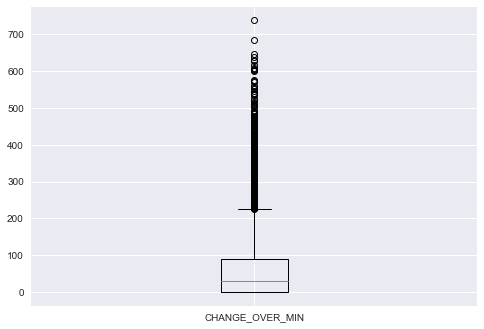

TEMPO_DE_SALA_MIN


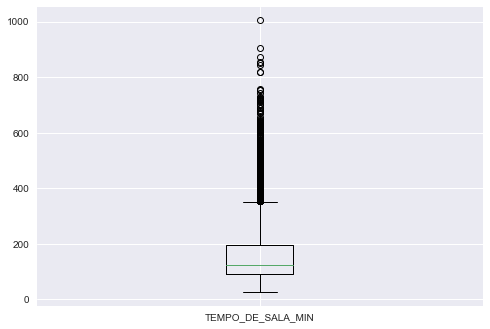

TEMPO_INTER_REAL_MIN


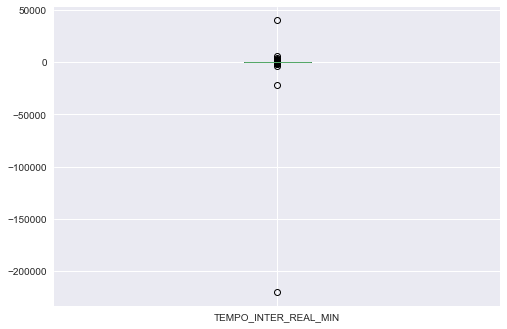

TEMPO_ADMISSAO_ANESTESIA_MIN


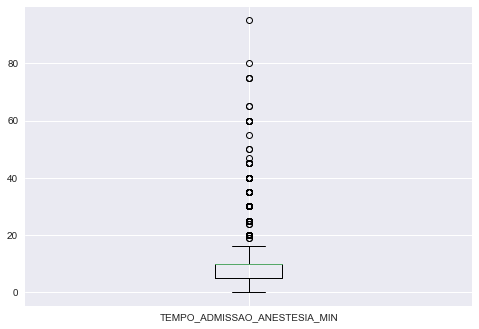

TEMPO_FIM_CIR_INICIO_ANESTESIA


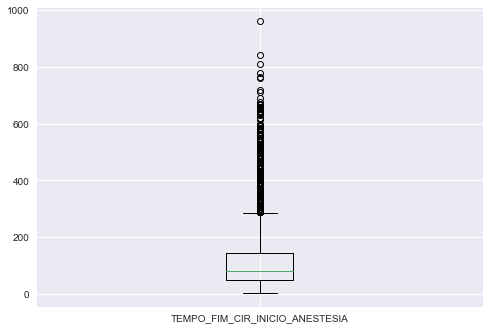

TEMPO_DURACAO_CIRURGIA_MIN


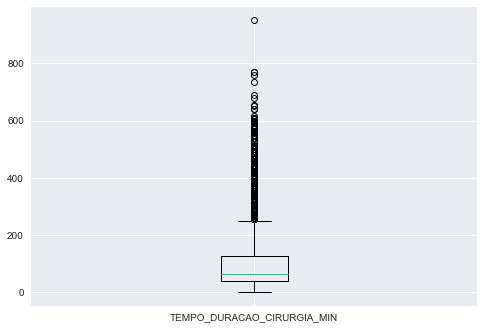

TEMPO_RECUPERACAO_MIN


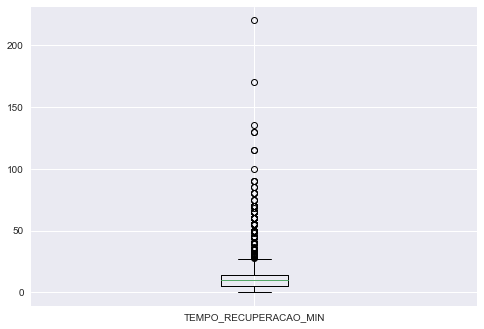

TEMPO_INICIAR_LIMPEZA_MIN


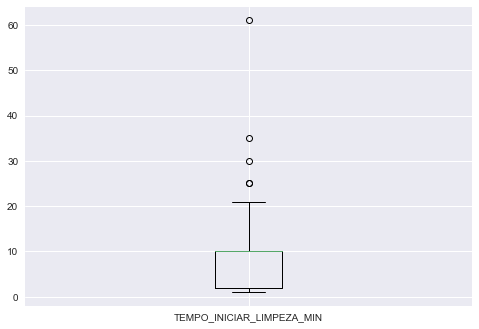

TEMPO_DURACAO_LIMPEZA_MIN


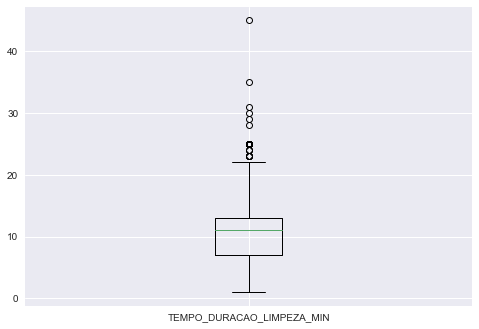

TEMPO_TOTAL_PROCEDIMENTO


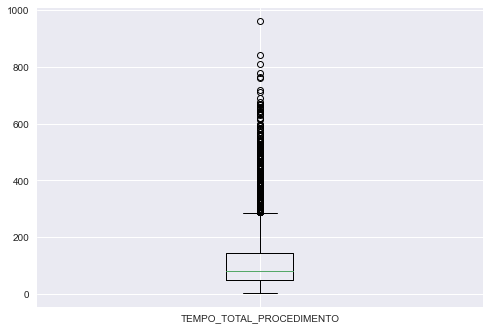

ERRO_TEMPO_ESTIMADO_REAL


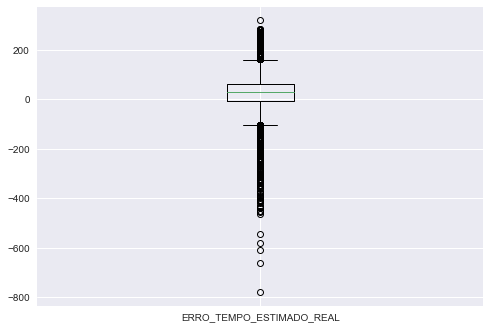

In [23]:
cols=['CHANGE_OVER_MIN','TEMPO_DE_SALA_MIN', 'TEMPO_INTER_REAL_MIN', 'TEMPO_ADMISSAO_ANESTESIA_MIN',
      'TEMPO_FIM_CIR_INICIO_ANESTESIA','TEMPO_DURACAO_CIRURGIA_MIN', 'TEMPO_RECUPERACAO_MIN','TEMPO_INICIAR_LIMPEZA_MIN',
      'TEMPO_DURACAO_LIMPEZA_MIN','TEMPO_TOTAL_PROCEDIMENTO','ERRO_TEMPO_ESTIMADO_REAL']

for col in cols:
    print(col)
    if df[col].min()<0 and col!='TEMPO_INTER_REAL_MIN' and col!='ERRO_TEMPO_ESTIMADO_REAL':
        print('\nValor negativo')
        lista_ids=df[df[col]<0].index.to_list()
        print(f'Retirar os ids:{lista_ids}')
        df.drop(lista_ids, axis=0, inplace=True)
        df.reset_index(drop=True, inplace=True)
    plt.boxplot(df[col])
    plt.xticks([1],[col])
    plt.show()


In [24]:
df.describe()

,TEMPO_ESTIMADO_MIN,N.um Cirurgias,VL_TEMPO_DURACAO_MIN,VL_IDADE,TEMPO_DE_SALA_MIN,ORDEM_CIR_DIA,CHANGE_OVER_MIN,TEMPO_INTER_REAL_MIN,TEMPO_ADMISSAO_ANESTESIA_MIN,TEMPO_FIM_CIR_INICIO_ANESTESIA,TEMPO_DURACAO_CIRURGIA_MIN,TEMPO_RECUPERACAO_MIN,TEMPO_INICIAR_LIMPEZA_MIN,TEMPO_DURACAO_LIMPEZA_MIN,TEMPO_TOTAL_PROCEDIMENTO,ERRO_TEMPO_ESTIMADO_REAL
count,8137.000000,8137.0,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000
mean,139.592233,1.0,143.906231,44.511368,160.896522,2.195527,63.881037,64.827330,10.314981,115.250016,98.238558,10.725405,6.532260,10.458031,115.250016,24.342217
std,76.527933,0.0,106.270139,22.073214,107.466704,1.197954,90.981376,2503.172028,5.937106,99.958745,92.313499,9.759605,3.966207,4.781303,99.958745,84.430097
min,30.000000,1.0,15.000000,0.000000,26.000000,1.000000,0.000000,-220370.000000,0.000000,3.000000,0.016667,0.116667,1.000000,1.000000,3.000000,-780.000000
25%,90.000000,1.0,73.000000,32.000000,90.000000,1.000000,0.000000,15.000000,5.000000,50.000000,40.000000,5.000000,2.000000,7.000000,50.000000,-5.000000
50%,120.000000,1.0,110.000000,42.000000,125.000000,2.000000,31.000000,50.000000,10.000000,80.000000,65.000000,10.000000,10.000000,11.000000,80.000000,30.000000
75%,180.000000,1.0,175.000000,55.000000,195.000000,3.000000,90.000000,130.000000,10.000000,145.000000,125.000000,14.000000,10.000000,13.000000,145.000000,61.000000
max,600.000000,1.0,990.000000,910.000000,1004.000000,8.000000,737.000000,40065.000000,95.000000,960.000000,950.000000,220.000000,61.000000,45.000000,960.000000,320.000000


#### Remover os outliers

A função substitui_outlier  utiliza o método de John Tukey (John Tukey, Exploratory Data Analysis, Addison-Wesley, 1977, pp. 43-44 )

In [25]:
# Função que identifica se o valor de uma coluna é um outlier baseado no método de John Tukey
# Entrada: banco de dados e o nome da coluna para verificar se há outliers
# Saida: coluna do banco de dados com os outliers acima do limite superior substituido pelo valor limite superior, abaixo
# substituido pelo valor limite inferior; esse tratamento foi feito para possível criação de modelo para determinar tempo de sala ou tempo change over
def substitui_outlier(df_func,col_func):
    fator=1.5
    q3=df_func[col_func].quantile(0.75)
    q1=df_func[col_func].quantile(0.25)
    iqr=q3-q1
    limite_sup = q3+(fator*iqr)
    limite_inf = q1-(fator*iqr)
    # Caso queria que retorne a lista dos índices dos outliers descomentar a linha abaixo e acrescentar
    # no return; return ficaria return df_func[col_func], lista_index
    #lista_index=(df_func[(df_func[col_func]>limite_sup)|(df_func[col_func]<limite_inf)]).index.to_list()
    df_func.loc[list(df[df_func[col_func]>limite_sup].index),col]=limite_sup
    df_func.loc[list(df[df_func[col_func]<limite_inf].index),col]=limite_inf
    return df_func[col_func]

In [26]:
#Banco de dados recebe a cópia do banco original, modifica o valor de outlier, mas não perde o valor original.
# Será modificado na cópia do banco de dados.
# O analista de dados ou cientista de dados ainda vai ter acesso aos dados originais caso seja necessário

df_sem_out=df.copy(deep=True)

for col in cols:
    df_sem_out[col]=substitui_outlier(df_sem_out,col)

CHANGE_OVER_MIN


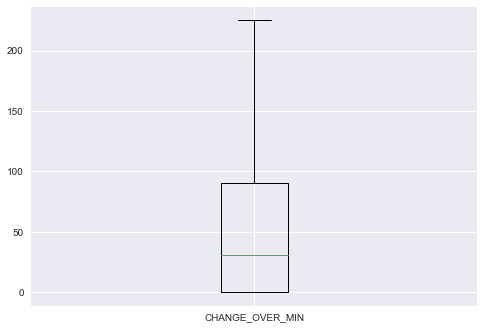

TEMPO_DE_SALA_MIN


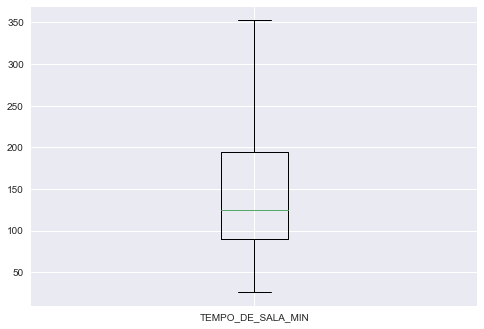

TEMPO_INTER_REAL_MIN


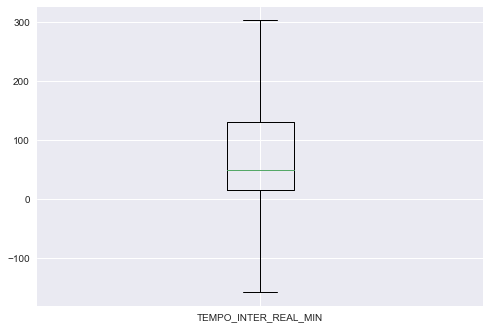

TEMPO_ADMISSAO_ANESTESIA_MIN


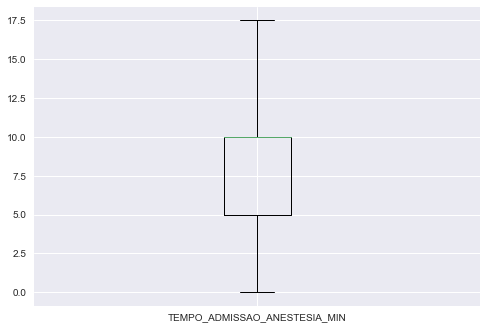

TEMPO_FIM_CIR_INICIO_ANESTESIA


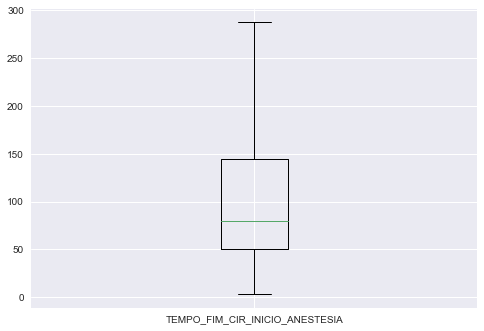

TEMPO_DURACAO_CIRURGIA_MIN


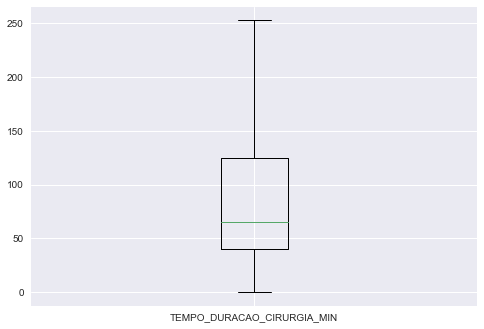

TEMPO_RECUPERACAO_MIN


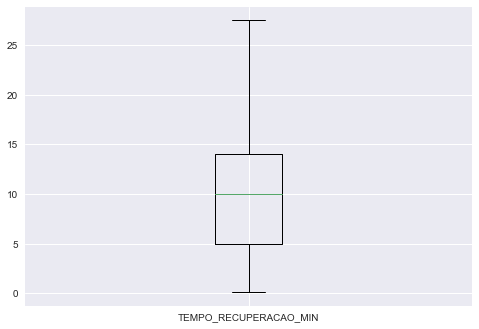

TEMPO_INICIAR_LIMPEZA_MIN


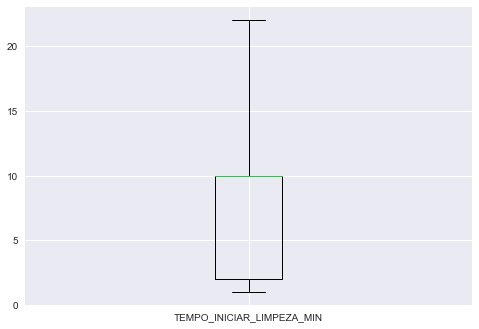

TEMPO_DURACAO_LIMPEZA_MIN


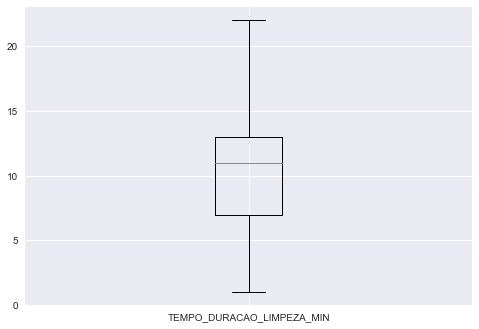

TEMPO_TOTAL_PROCEDIMENTO


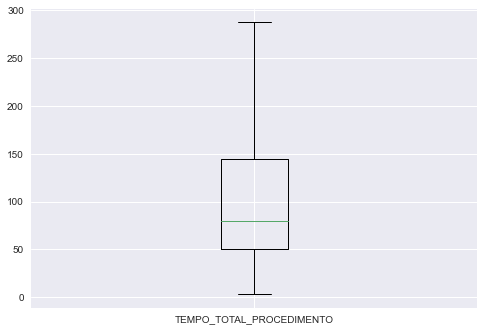

ERRO_TEMPO_ESTIMADO_REAL


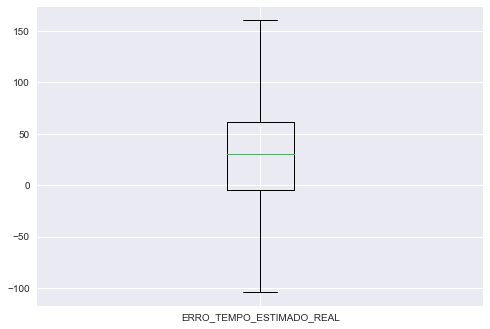

In [27]:
for col in cols:
    print(col)
    plt.boxplot(df_sem_out[col])
    plt.xticks([1],[col])
    plt.show()

In [28]:
df_sem_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8137 entries, 0 to 8136
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   CD_AVISO_CIRURGIA               8137 non-null   object        
 1   CD_ATENDIMENTO                  8137 non-null   object        
 2   CD_CIRURGIA                     8137 non-null   object        
 3   CD_ESPECIALID                   8137 non-null   object        
 4   TEMPO_ESTIMADO                  8137 non-null   object        
 5   TEMPO_ESTIMADO_MIN              8137 non-null   float64       
 6   DS_ESPECIALID                   8137 non-null   string        
 7   DS_CIRURGIA                     8137 non-null   string        
 8   N.um Cirurgias                  8137 non-null   Int64         
 9   CD_PRESTADOR                    8137 non-null   object        
 10  DS_ATI_MED                      8137 non-null   string        
 11  CD_C

In [29]:
df_sem_out.describe()

,TEMPO_ESTIMADO_MIN,N.um Cirurgias,VL_TEMPO_DURACAO_MIN,VL_IDADE,TEMPO_DE_SALA_MIN,ORDEM_CIR_DIA,CHANGE_OVER_MIN,TEMPO_INTER_REAL_MIN,TEMPO_ADMISSAO_ANESTESIA_MIN,TEMPO_FIM_CIR_INICIO_ANESTESIA,TEMPO_DURACAO_CIRURGIA_MIN,TEMPO_RECUPERACAO_MIN,TEMPO_INICIAR_LIMPEZA_MIN,TEMPO_DURACAO_LIMPEZA_MIN,TEMPO_TOTAL_PROCEDIMENTO,ERRO_TEMPO_ESTIMADO_REAL
count,8137.000000,8137.0,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.000000,8137.00000,8137.000000,8137.000000,8137.000000,8137.000000,8137.00000,8137.000000
mean,139.592233,1.0,143.906231,44.511368,153.957724,2.195527,57.207693,76.744498,9.689689,108.18869,91.263258,10.049912,6.524149,10.381467,108.18869,26.647200
std,76.527933,0.0,106.270139,22.073214,85.852351,1.197954,69.465425,115.767060,3.875933,77.77461,70.212864,6.637453,3.906659,4.557401,77.77461,61.285618
min,30.000000,1.0,15.000000,0.000000,26.000000,1.000000,0.000000,-157.500000,0.000000,3.00000,0.016667,0.116667,1.000000,1.000000,3.00000,-104.000000
25%,90.000000,1.0,73.000000,32.000000,90.000000,1.000000,0.000000,15.000000,5.000000,50.00000,40.000000,5.000000,2.000000,7.000000,50.00000,-5.000000
50%,120.000000,1.0,110.000000,42.000000,125.000000,2.000000,31.000000,50.000000,10.000000,80.00000,65.000000,10.000000,10.000000,11.000000,80.00000,30.000000
75%,180.000000,1.0,175.000000,55.000000,195.000000,3.000000,90.000000,130.000000,10.000000,145.00000,125.000000,14.000000,10.000000,13.000000,145.00000,61.000000
max,600.000000,1.0,990.000000,910.000000,352.500000,8.000000,225.000000,302.500000,17.500000,287.50000,252.500000,27.500000,22.000000,22.000000,287.50000,160.000000


### EDA

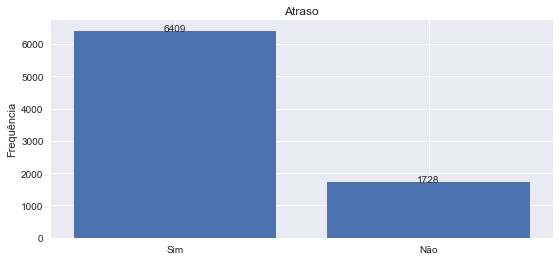

In [30]:
# função que acrescenta rótulos no gráfico de barras
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

#Atraso sim ou não
valores_atraso_sim_nao=df_sem_out['ATRASO_SIM_NAO'].value_counts()
rotulos_atraso_sim_nao=valores_atraso_sim_nao.index

plt.figure(figsize=(9,4))
plt.bar(rotulos_atraso_sim_nao,valores_atraso_sim_nao)
addlabels(rotulos_atraso_sim_nao,valores_atraso_sim_nao)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Frequência')
plt.title('Atraso')
plt.show()

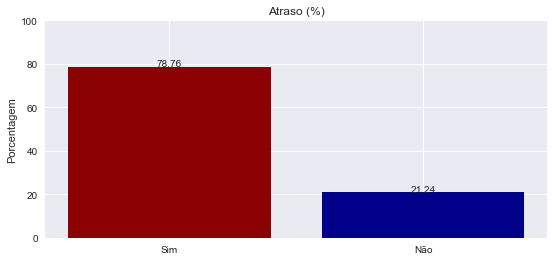

In [31]:
#Atraso sim ou não em %
valores_atraso_sim_nao=round((df_sem_out['ATRASO_SIM_NAO'].value_counts()/sum(df_sem_out['ATRASO_SIM_NAO'].value_counts().values)*100),2)
rotulos_atraso_sim_nao=valores_atraso_sim_nao.index

plt.figure(figsize=(9,4))
plt.bar(rotulos_atraso_sim_nao,valores_atraso_sim_nao,color=('darkred','darkblue'))
addlabels(rotulos_atraso_sim_nao,valores_atraso_sim_nao)
plt.ylim(0,100)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Porcentagem')
plt.title('Atraso (%)')
plt.show()

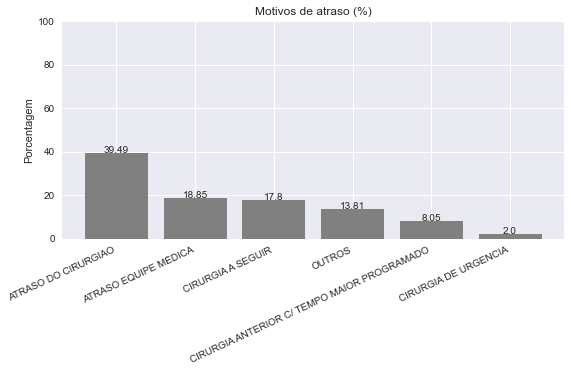

In [32]:
#Quais os motivos de atraso
rotulos_atraso=df_sem_out['DS_MOT_ATRASO'][df_sem_out['DS_MOT_ATRASO']!="SEM ATRASO"].value_counts().index
valores_atraso=round(df_sem_out['DS_MOT_ATRASO'][df_sem_out['DS_MOT_ATRASO']!="SEM ATRASO"].value_counts()/sum(df_sem_out['DS_MOT_ATRASO'][df_sem_out['DS_MOT_ATRASO']!="SEM ATRASO"].value_counts().values)*100,2)

plt.figure(figsize=(9,4))
plt.bar(rotulos_atraso,valores_atraso,color='gray')
addlabels(rotulos_atraso,valores_atraso)
plt.ylim(0,100)
plt.xticks(rotation=25, ha='right')
plt.ylabel('Porcentagem')
plt.title('Motivos de atraso (%)')
plt.show()

domingo      39
segunda    1107
terça      1415
quarta     1408
quinta     1551
sexta      1554
sábado     1063


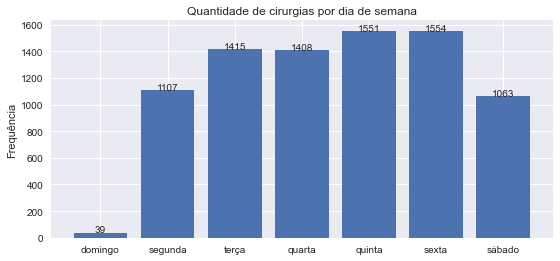

In [33]:
freq_dia_semana=df_sem_out['Dia da semana'].value_counts().sort_index()
freq_dia_semana.rename(index={'1':'domingo','2':'segunda','3':'terça','4':'quarta','5':'quinta','6':'sexta','7':'sábado'},inplace=True)
rotulos_dia_semana=freq_dia_semana.index
print(freq_dia_semana.to_string())
plt.figure(figsize=(9,4))
plt.bar(rotulos_dia_semana,freq_dia_semana)
addlabels(rotulos_dia_semana,freq_dia_semana)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Frequência')
plt.title('Quantidade de cirurgias por dia de semana')
plt.show()

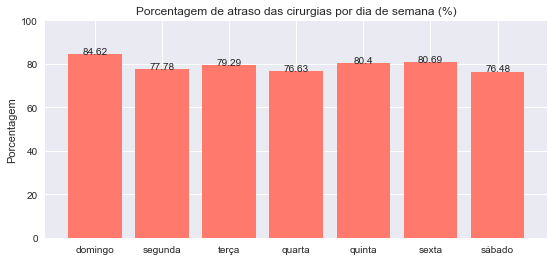

In [34]:
valores_percent_atraso=round((df_sem_out['Dia da semana'][df_sem_out['DS_MOT_ATRASO']!="SEM ATRASO"].value_counts()/df_sem_out['Dia da semana'].value_counts())*100,2).sort_index()
# Dia da semana está de 1 a 7, renomear para domingo, segunda, terça, quarta, quinta, sexta e sábado
valores_percent_atraso.rename(index={'1':'domingo','2':'segunda','3':'terça','4':'quarta','5':'quinta','6':'sexta','7':'sábado'},inplace=True)
rotulos_dia_semana=valores_percent_atraso.index
plt.figure(figsize=(9,4))
plt.bar(rotulos_dia_semana,valores_percent_atraso, color='xkcd:salmon')
addlabels(rotulos_dia_semana,valores_percent_atraso)
plt.ylim(0,100)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de atraso das cirurgias por dia de semana (%)')
plt.show()

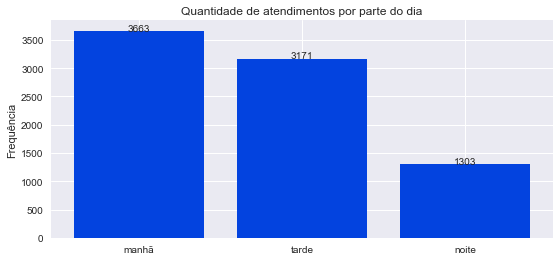

In [35]:
valores_parte_dia=df_sem_out['PARTE_DIA'].value_counts()
rotulos_parte_dia=valores_parte_dia.index
plt.figure(figsize=(9,4))
plt.bar(rotulos_parte_dia,valores_parte_dia, color='xkcd:blue')
addlabels(rotulos_parte_dia,valores_parte_dia)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Frequência')
plt.title('Quantidade de atendimentos por parte do dia')
plt.show()

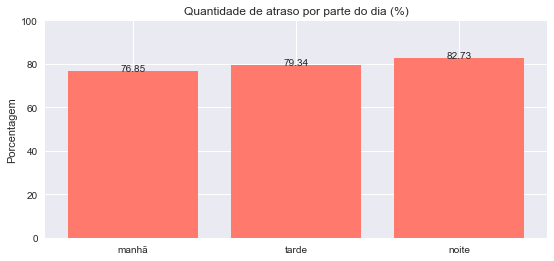

In [36]:
valores_atraso_parte_dia=df_sem_out['PARTE_DIA'][df_sem_out['DS_MOT_ATRASO']!="SEM ATRASO"].value_counts()
valores_parte_dia=df_sem_out['PARTE_DIA'].value_counts()
rotulos_parte_dia=valores_atraso_parte_dia.index
porcentagem_atraso_parte_dia = round((valores_atraso_parte_dia/valores_parte_dia)*100,2)
plt.figure(figsize=(9,4))
plt.bar(rotulos_parte_dia,porcentagem_atraso_parte_dia, color='xkcd:salmon')
addlabels(rotulos_parte_dia,porcentagem_atraso_parte_dia)
plt.ylim(0,100)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Porcentagem')
plt.title('Quantidade de atraso por parte do dia (%)')
plt.show()

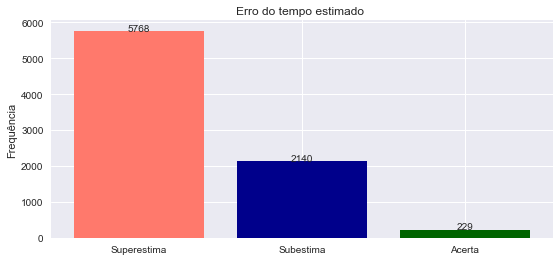

In [37]:
tempo_estimado=df['ERRO_CLASSIFICA_PREDITOR'].value_counts()
rotulo_tempo_estimado=tempo_estimado.index
plt.figure(figsize=(9,4))
plt.bar(rotulo_tempo_estimado,tempo_estimado, color=('xkcd:salmon','darkblue','darkgreen'))
addlabels(rotulo_tempo_estimado,tempo_estimado)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Frequência')
plt.title('Erro do tempo estimado ')
plt.show()

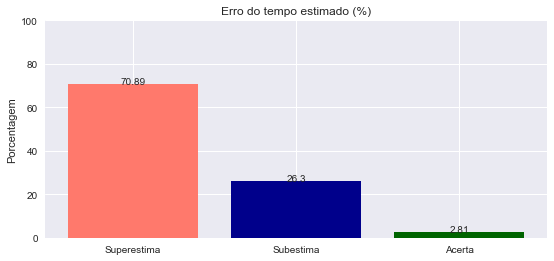

In [38]:
tempo_estimado=round((df['ERRO_CLASSIFICA_PREDITOR'].value_counts()/df['ERRO_CLASSIFICA_PREDITOR'].value_counts().sum())*100,2)
rotulo_tempo_estimado=tempo_estimado.index
plt.figure(figsize=(9,4))
plt.bar(rotulo_tempo_estimado,tempo_estimado, color=('xkcd:salmon','darkblue','darkgreen'))
addlabels(rotulo_tempo_estimado,tempo_estimado)
plt.ylim(0,100)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Porcentagem')
plt.title('Erro do tempo estimado (%)')
plt.show()

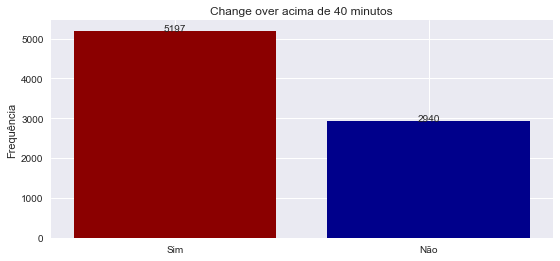

In [39]:
change_over_acima_40_min=df_sem_out['CHANGE_OVER_ACIMA40MIN'].value_counts()
change_over_acima_40_min.rename(index={'1':'Sim','0':'Não'},inplace=True)
rotulos_change_over_acima_40_min=change_over_acima_40_min.index
plt.figure(figsize=(9,4))
plt.bar(rotulos_change_over_acima_40_min,change_over_acima_40_min, color=('darkred','darkblue'))
addlabels(rotulos_change_over_acima_40_min,change_over_acima_40_min)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Frequência')
plt.title('Change over acima de 40 minutos')
plt.show()

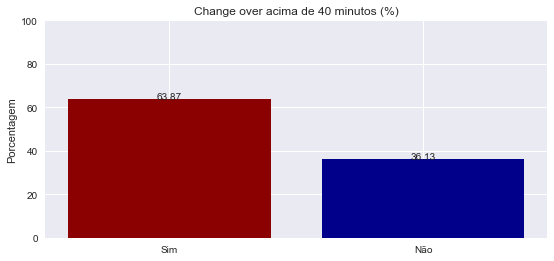

In [40]:
change_over_acima_40_min=round(df_sem_out['CHANGE_OVER_ACIMA40MIN'].value_counts()/df_sem_out['CHANGE_OVER_ACIMA40MIN'].value_counts().sum()*100,2)
change_over_acima_40_min.rename(index={'1':'Sim','0':'Não'},inplace=True)
rotulos_change_over_acima_40_min=change_over_acima_40_min.index
plt.figure(figsize=(9,4))
plt.bar(rotulos_change_over_acima_40_min,change_over_acima_40_min, color=('darkred','darkblue'))
addlabels(rotulos_change_over_acima_40_min,change_over_acima_40_min)
plt.ylim(0,100)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Porcentagem')
plt.title('Change over acima de 40 minutos (%)')
plt.show()

In [41]:
print((df_sem_out['DS_ESPECIALID'].value_counts()).to_string())

ORTOPEDIA                       1906
CIRURGIA VASCULAR               1034
UROLOGIA                         774
CIRURGIA GERAL                   704
NEUROCIRURGIA                    614
GASTROENTEROLOGIA                426
ONCOLOGIA CIRURGICA              396
CIRURGIA CARDIOVASCULAR          333
CIRURGIA PLASTICA                293
HEPATOLOGIA                      249
GINECOLOGIA                      200
CARDIOLOGIA                      194
OTORRINOLARINGOLOGIA             166
CIRURGIA BUCOMAXILOFACIAL        127
CLINICA GERAL                    119
CIRURGIA GASTROENTEROLÓGICA       98
ODONTOLOGIA CIR. TRAUMA BUCO      95
ONCOLOGIA                         87
CIRURGIA DE CABEÇA E PESCOÇO      77
CIRURGIA TORACICA                 60
OFTALMOLOGIA                      41
MASTOLOGIA                        34
HEMATOLOGIA                       30
PROCTOLOGIA                       17
CIRURGIA CARDIACA                 16
NEFROLOGIA                        16
ANGIOLOGIA                         6
N

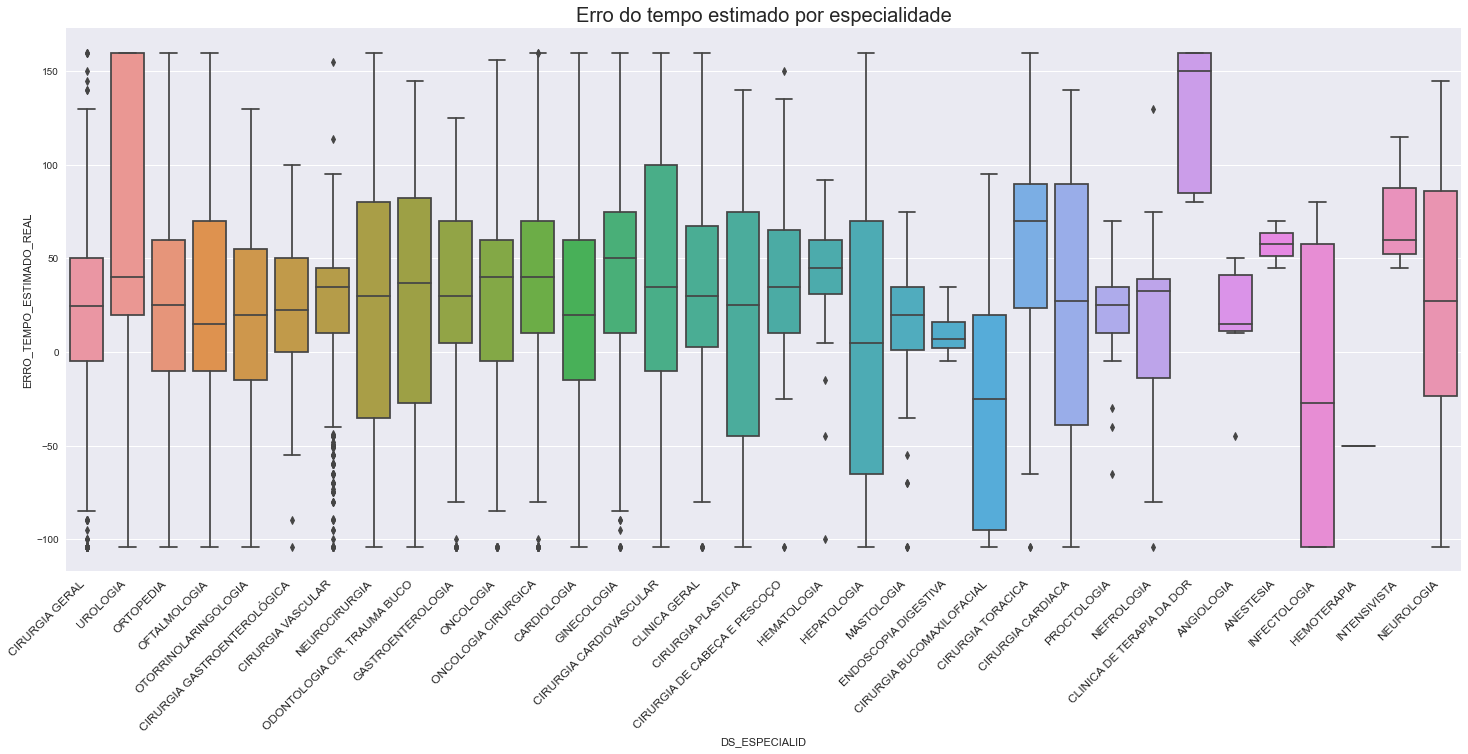

In [42]:
plt.figure(figsize=(25, 10))
plt.title('Erro do tempo estimado por especialidade',size=20)
sns.boxplot(data=df_sem_out,y='ERRO_TEMPO_ESTIMADO_REAL',x='DS_ESPECIALID',orient='v')
plt.xticks(rotation=45, ha='right',size=12)
plt.show()

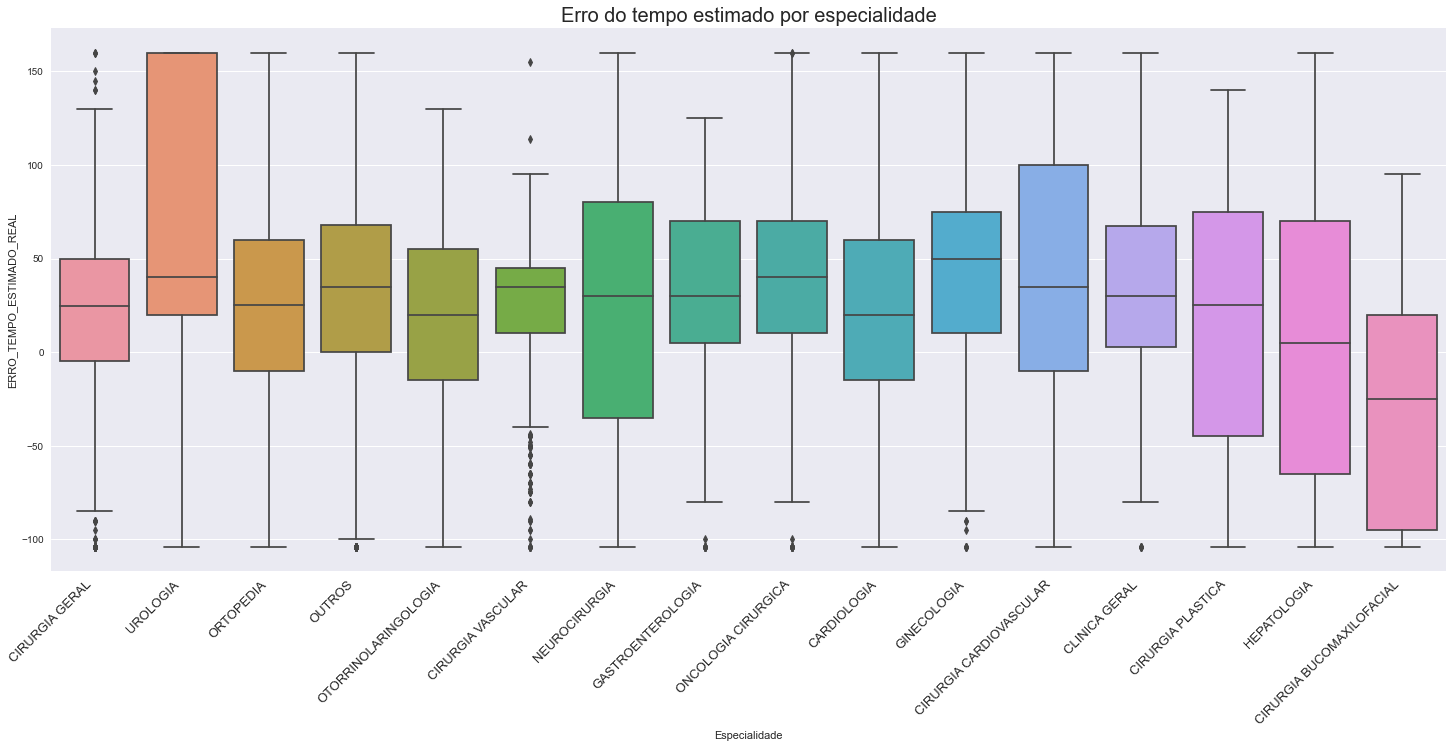

In [43]:
# Foi agrupado especialidade com frequência abaixo de 100 no gráfico abaixo
plt.figure(figsize=(25, 10))
plt.title('Erro do tempo estimado por especialidade',size=20)
sns.boxplot(data=df_sem_out,y='ERRO_TEMPO_ESTIMADO_REAL',x='Especialidade',orient='v')
plt.xticks(rotation=45, ha='right',size=13)
plt.show()

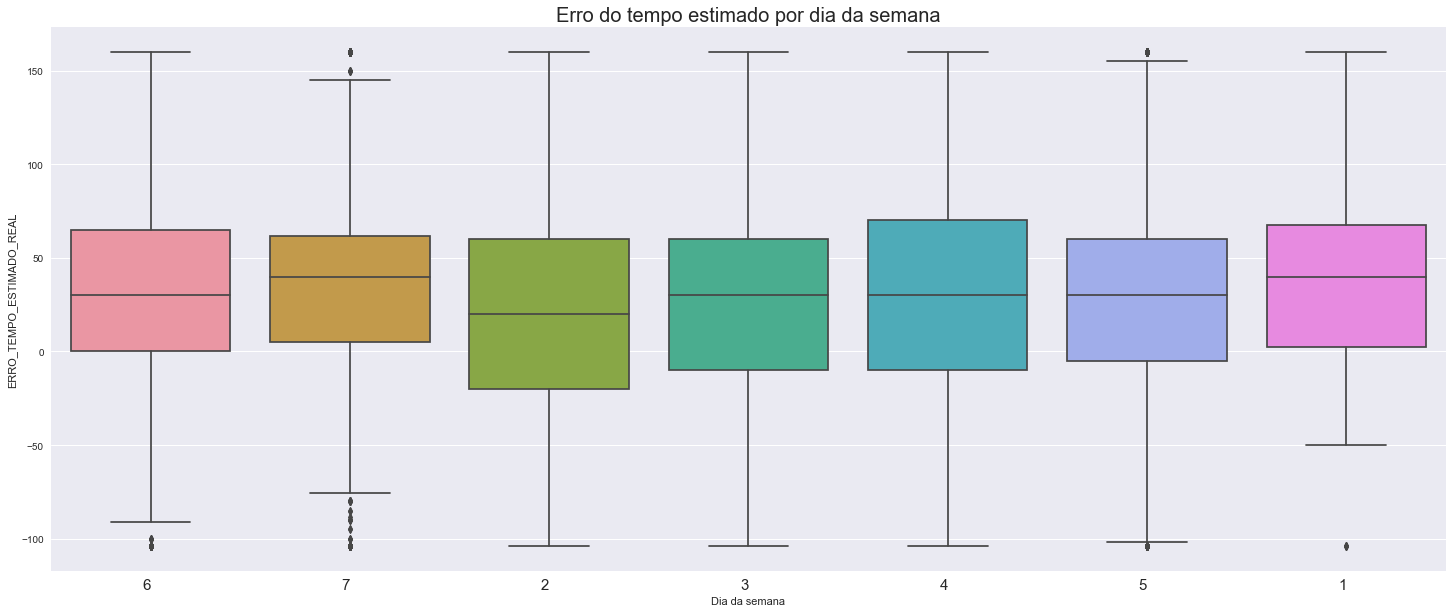

In [44]:
plt.figure(figsize=(25, 10))
plt.title('Erro do tempo estimado por dia da semana',size=20)
sns.boxplot(data=df_sem_out,y='ERRO_TEMPO_ESTIMADO_REAL',x='Dia da semana',orient='v')
plt.xticks(rotation=0, ha='right',size=15)
plt.show()

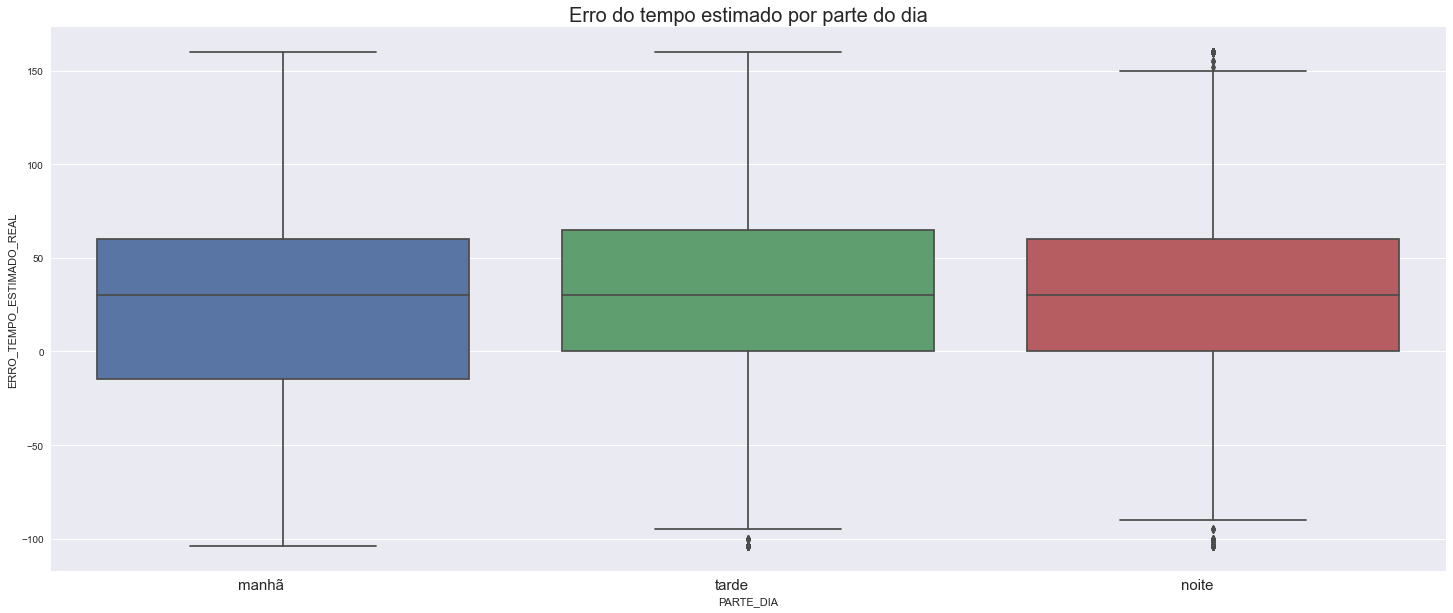

In [45]:
plt.figure(figsize=(25, 10))
plt.title('Erro do tempo estimado por parte do dia',size=20)
sns.boxplot(data=df_sem_out,y='ERRO_TEMPO_ESTIMADO_REAL',x='PARTE_DIA',orient='v')
plt.xticks(rotation=0, ha='right',size=15)
plt.show()

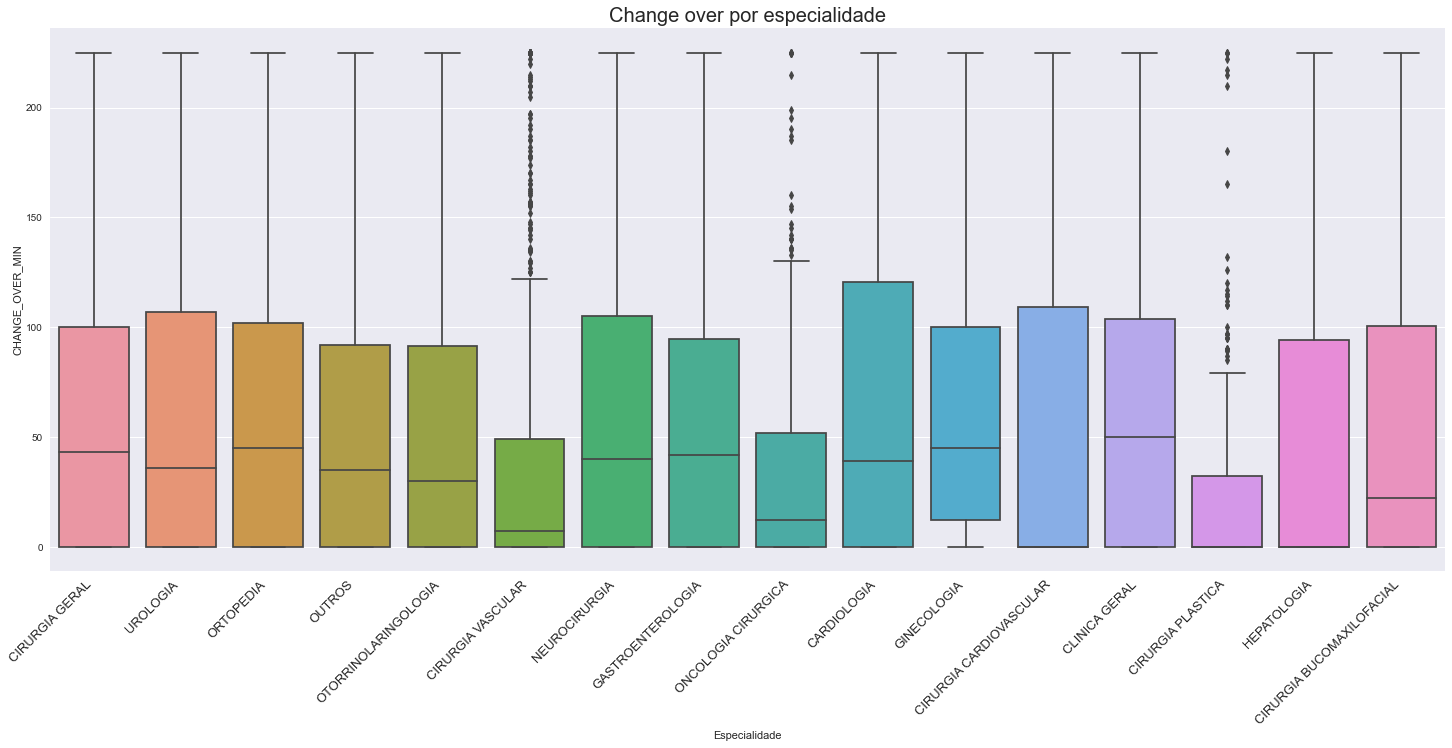

In [46]:
plt.figure(figsize=(25, 10))
plt.title('Change over por especialidade',size=20)
sns.boxplot(data=df_sem_out,y='CHANGE_OVER_MIN',x='Especialidade',orient='v')
plt.xticks(rotation=45, ha='right',size=13)
plt.show()

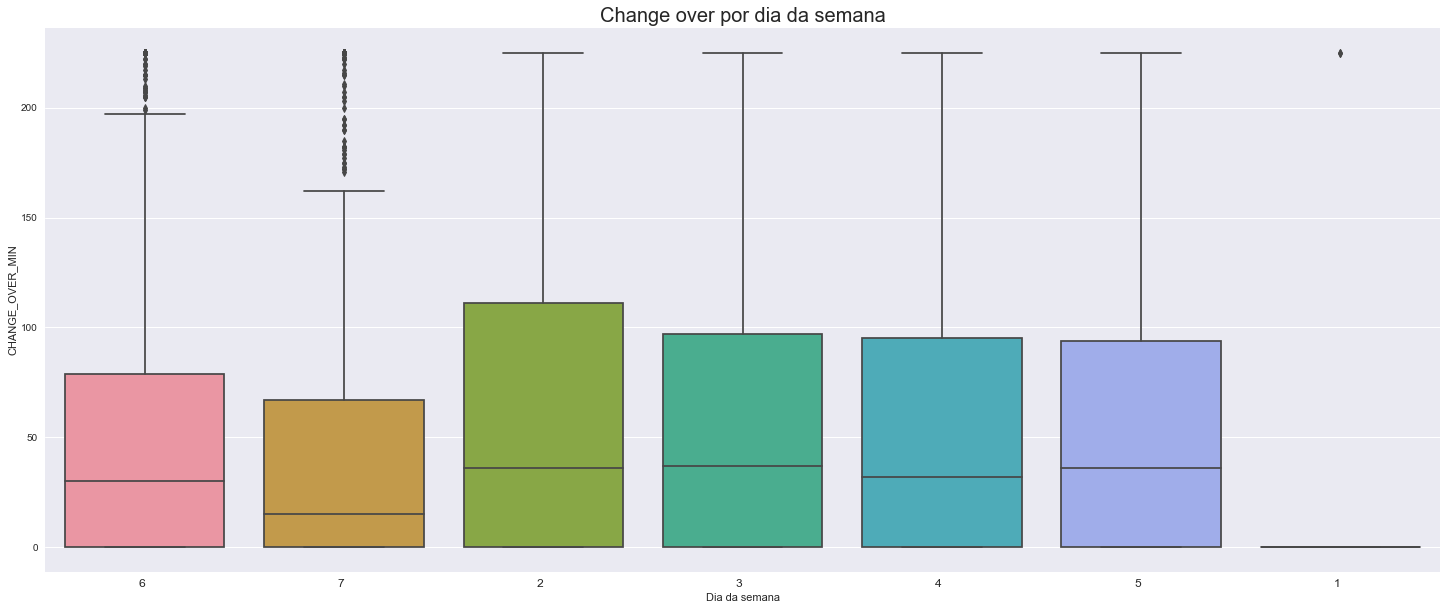

In [47]:
plt.figure(figsize=(25, 10))
plt.title('Change over por dia da semana',size=20)
sns.boxplot(data=df_sem_out,y='CHANGE_OVER_MIN',x='Dia da semana',orient='v')
plt.xticks(rotation=0, ha='right',size=12)
plt.show()

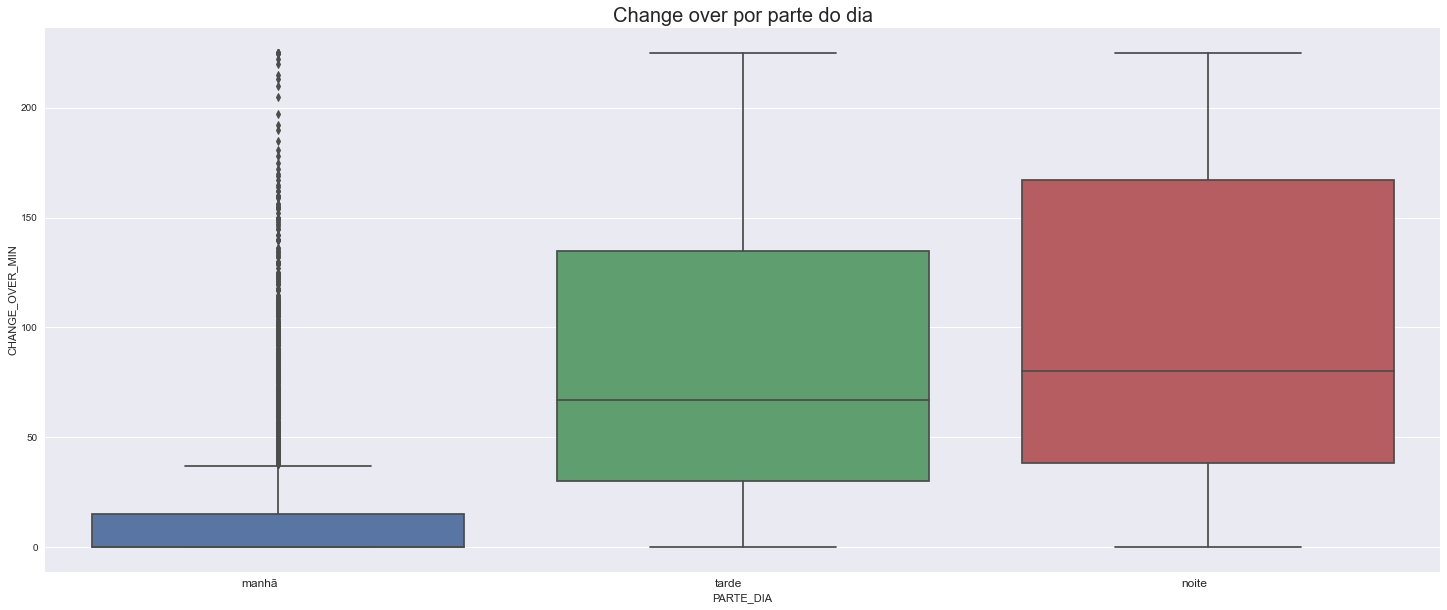

In [48]:
plt.figure(figsize=(25, 10))
plt.title('Change over por parte do dia',size=20)
sns.boxplot(data=df_sem_out,y='CHANGE_OVER_MIN',x='PARTE_DIA',orient='v')
plt.xticks(rotation=0, ha='right',size=12)
plt.show()